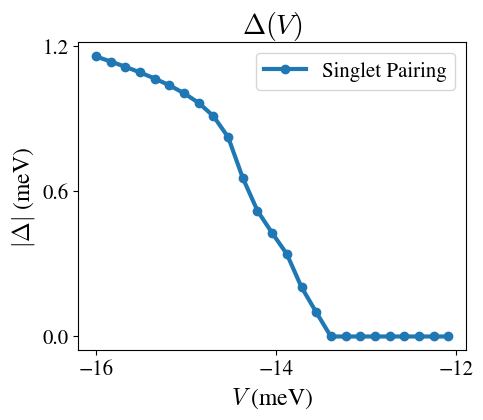

In [33]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib
matplotlib.rcParams["mathtext.fontset"] = "cm"
matplotlib.rcParams["font.family"] = "STIXGeneral"

z = np.load("fig2/singlet/posthoc_results.npz")
V  = z["V"]
d0  = z["d0_re"] + 1j*z["d0_im"]
d1  = z["d1_re"] + 1j*z["d1_im"]
mu  = z["mu"]; n = z["n"]; res = z["resnorm"]; ok = z["success"]

plt.figure(figsize=(5.0, 4))
plt.plot(V[::2]*1000, 1000*np.abs(d0[::2]), "o-", label="Singlet Pairing",markersize=6,linewidth=3)
#plt.plot(V, np.abs(d1), "s-", label="|Δ1|")
plt.xlabel(r"$V$ (meV)",fontsize=17);
plt.ylabel(r"$|\Delta|$ (meV)",fontsize=17);
plt.xticks([-16,-14,-12],fontsize=15)
plt.yticks([0,0.6,1.2],fontsize=15)
plt.title(r"$\Delta(V)$",fontsize=20); 
plt.legend(fontsize=15);  


z1 = np.load("fig2/triplet/posthoc_results.npz")

plt.savefig("figs/fig2.pdf",bbox_inches='tight')

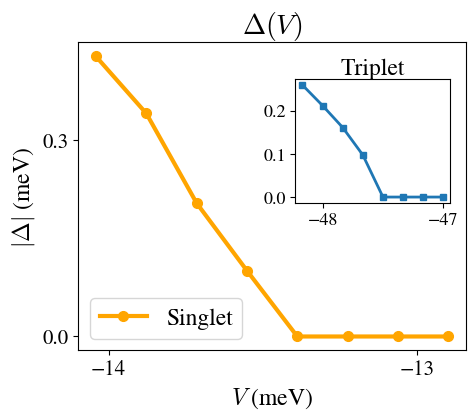

In [68]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

import matplotlib
matplotlib.rcParams["mathtext.fontset"] = "cm"
matplotlib.rcParams["font.family"] = "STIXGeneral"

# --- main data (singlet) ---
z  = np.load("fig2/singlet/posthoc_results.npz")
V  = z["V"]
d0 = z["d0_re"] + 1j*z["d0_im"]
# d1 = z["d1_re"] + 1j*z["d1_im"]  # unused

# --- inset data (triplet) ---
z1   = np.load("fig2/triplet/posthoc_results.npz")
V1   = z1["V"]
d0_1 = z1["d0_re"] + 1j*z1["d0_im"]

# --- figure & main axis ---
fig, ax = plt.subplots(figsize=(5.0, 4.0))
newV=V[::2]; newd=d0[::2]
ax.plot(newV[12:20]*1000, 1000*np.abs( newd[12:20]),
        "o-", label="Singlet",color="orange", markersize=7, linewidth=3)

ax.set_xlabel(r"$V$ (meV)", fontsize=17)
ax.set_ylabel(r"$|\Delta|$ (meV)", fontsize=17)
ax.set_xticks([ -14, -13]); ax.tick_params(labelsize=15)
ax.set_yticks([0, 0.3]);   ax.tick_params(labelsize=15)
ax.set_title(r"$\Delta(V)$", fontsize=20)
ax.legend(fontsize=17, loc="lower left")

# --- inset axis (triplet) ---
# [x0, y0, width, height] in axes coordinates (0..1)
axins = ax.inset_axes([0.56, 0.48, 0.40, 0.40])  # tweak to taste

axins.plot(V1[2:10]*1000, 1000*np.abs(d0_1[2:10]),
           "s-", linewidth=2, markersize=4)

# Keep inset minimal: no axis labels; smaller ticks
axins.tick_params(labelsize=10)
axins.set_title("Triplet", fontsize=17, pad=2)

#axins.set_xlim(-48.18, -47)
#axins.set_ylim(0, 0.3)
axins.set_xticks([-48, -47])
axins.tick_params(labelsize=13)
# Optional: match similar tick steps (comment out if you prefer autoscale)
# axins.set_xticks([-16, -14, -12])
# axins.set_yticks([0, 0.6, 1.2])

# Optional: thin frame around inset
for spine in axins.spines.values():
    spine.set_linewidth(0.8)

fig.savefig("figs/fig2.pdf", bbox_inches="tight")
